# Alpha Vertex: PreCog 100/500 Securities
In this notebook, we'll take a look at the Alpha Vertex *Top 100/500 Securities PreCog* dataset, available on [Quantopian](https://www.quantopian.com/store). This dataset spans 2010 through the current day. PreCog uses machine learning models to forecast stock returns at multiple horizons.

The *100* dataset contains 5 day predicted log returns for the top 100 securities by market cap. The *500* dataset contains 5 day predicted log returns for the top 500 securities by market cap.

Update time: Daily data will be updated close to midnight for the previous day. So on the 27th, you will have data with an asof_date of the 26th.

## Notebook Contents
There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href="#interactive"><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href="#pipeline"><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available in both the Research & Backtesting environments. Recommended for factor development and moving back & forth between research/backtesting.

### Free samples and limits
The result of any expression is limited to 10,000 rows to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase access to the full set.

<a></a></a>

# Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to perform a reduction expression on your dataset so that you don't have to pull the whole dataset into memory. You can convert the result of a blaze expression to a Pandas data structure (e.g. a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)) and perform further computation, manipulation, and visualization on that structure.

Helpful links:

* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you have a Blaze expression that reduces the dataset to less than 10,000 rows, you can convert it to a Pandas DataFrames using:

> `from odo import odo`
> `odo(expr, pandas.DataFrame)`

#### To see how to create a factor using this data, search for the `Pipeline Overview` section of this notebook or head straight to <a href="#pipeline">Pipeline Overview</a>.

In [1]:
# import the free sample of the dataset
from quantopian.interactive.data.alpha_vertex import (
    # Top 100 Securities
    precog_top_100 as dataset_100,
    # Top 500 Securities
    precog_top_500 as dataset_500
)

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset_500.asof_date.max()

Timestamp('2017-03-06 00:00:00')

In [3]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset_500.count()

915545

In [4]:
# Let's see what the data looks like. We'll grab the first few rows.
dataset_500.peek()

,symbol,name,sid,predicted_five_day_log_return,asof_date,timestamp
0,AA,ALCOA INC,2,0.064,2010-01-04,2010-01-05
1,AAPL,APPLE INC,24,0.000,2010-01-04,2010-01-05
2,ABT,ABBOTT LABORATORIES,62,-0.001,2010-01-04,2010-01-05
3,ABX,BARRICK GOLD CORP,64,0.013,2010-01-04,2010-01-05
4,ADSK,AUTODESK INC,67,-0.040,2010-01-04,2010-01-05
5,TAP,MOLSON COORS BREWING CO,76,0.012,2010-01-04,2010-01-05
6,ADBE,ADOBE SYSTEMS INC,114,-0.013,2010-01-04,2010-01-05
7,ADI,ANALOG DEVICES INC,122,-0.023,2010-01-04,2010-01-05
8,ADM,ARCHER-DANIELS-MIDLAND CO,128,-0.020,2010-01-04,2010-01-05
9,AEP,AMERICAN ELECTRIC POWER CO INC,161,0.013,2010-01-04,2010-01-05


Let's go over the columns:

- **symbol**: The ticker symbol of the company.
- **sid**: The security ID (see [here](https://www.quantopian.com/tutorials/getting-started#lesson3) for explanation).
- **name**: The name of the company.
- **asof_date**: The date to which this data applies/actual report date
- **timestamp**: This is our timestamp on when we registered the data.
- **predicted_five_day_log_return**: The predicted log return for the security over the next 5 days

Fields like `timestamp` and `sid` are standardized across all Quantopian Store Datasets, so the datasets are easy to combine. The `sid` field is also standardized across all Quantopian equity databases.

Now that we understand the data a bit better, let's get the `predicted_five_day_log_return` data for Apple (sid 24) and visualize it with a chart.

In [5]:
# We start by defining a Blaze expression that gets the rows where symbol == AAPL.
aapl_data = dataset_500[dataset_500.symbol == 'AAPL']

# We then convert the Blaze expression to a pandas DataFrame, which is populated
# with the data resulting from our Blaze expression.
aapl_df = odo(aapl_data, pd.DataFrame)

# Display the first few rows of the DataFrame.
aapl_df.head()

,symbol,name,sid,predicted_five_day_log_return,asof_date,timestamp
0,AAPL,APPLE INC,24,0.000,2010-01-04,2010-01-05
1,AAPL,APPLE INC,24,0.003,2010-01-05,2010-01-06
2,AAPL,APPLE INC,24,0.016,2010-01-06,2010-01-07
3,AAPL,APPLE INC,24,-0.022,2010-01-07,2010-01-08
4,AAPL,APPLE INC,24,0.011,2010-01-08,2010-01-09


In [6]:
# For plotting purposes, set the index of the DataFrame to the asof_date.
aapl_df.set_index('asof_date', inplace=True)

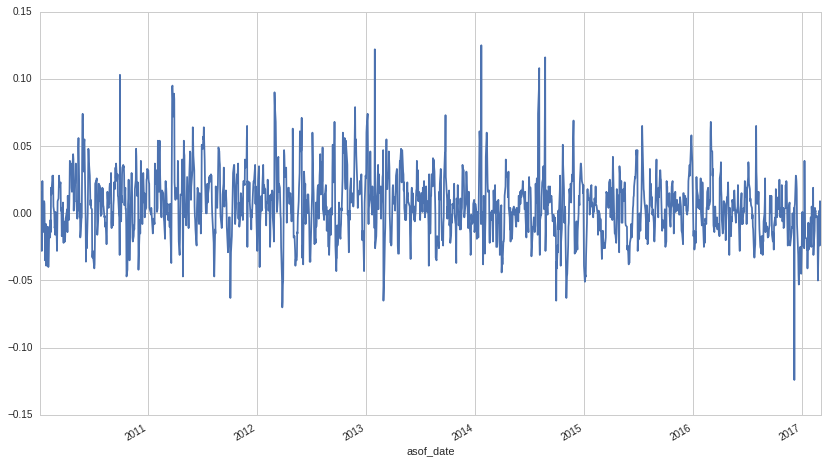

In [7]:
# Plot the predicted 5-day log return data.
aapl_df['predicted_five_day_log_return'].plot()

<a></a></a>

# Pipeline Overview
[Pipeline](https://www.quantopian.com/tutorials/pipeline) is a tool that can be used to define computations called factors, filters, or classifiers. These computations can be used in an algorithm to dynamically select securities, compute portfolio weights, compute risk factors, and more. 

In research, pipeline is mostly used to explore these computations.

The only method for accessing partner data within an algorithm on Quantopian is in a pipeline. Before moving to [the IDE](https://www.quantopian.com/algorithms) to work on an algorithm, it's a good idea to define your pipeline in research, so that you can iterate on an idea and analyze the output.

To start, we need to import the following:

In [8]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

To access partner data in pipeline, you must import the dataset. If the data is in a format that's difficult to use (e.g. event-based datasets), the data is sometimes available via built-in factors or filters. There are no such built-ins for the Alpha Vertex dataset as the prediction data is in a nice, usable format.

Let's import the pipeline version of the Alpha Vertex dataset:

In [9]:
# These imports can be found in the store panel for each dataset
# (https://www.quantopian.com/data). Note that not all store datasets
# can be used in pipeline yet.
from quantopian.pipeline.data.alpha_vertex import (
    # Top 100 Securities
    precog_top_100 as dataset_100,
    # Top 500 Securities|
    precog_top_500 as dataset_500
)

Now that we've imported the data, let's take a look at which fields are available for each dataset, along with their datatypes.

In [10]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

_print_fields(dataset_500)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: precog_top_500

Fields:
name - object
predicted_five_day_log_return - float64
asof_date - datetime64[ns]
symbol - object


---------------------------------------------------



Now that we know what fields we have access to, let's define a [pipeline](https://www.quantopian.com/tutorials/pipeline) that gets the latest predicted five day log return for the PreCog 500 dataset for stocks in the [Q1500US](https://www.quantopian.com/tutorials/pipeline#lesson11).

In [11]:
# Import the Q1500US pipeline filter.
from quantopian.pipeline.filters.morningstar import Q1500US

In [12]:
# We only want to get the signal for stocks in the Q1500US that have a non-null
# latest predicted_five_day_log_return.
universe = (Q1500US() & dataset_500.predicted_five_day_log_return.latest.notnull())

# Define our pipeline to return the latest prediction for the stocks in `universe`.
pipe = Pipeline(columns= {
                    'prediction': dataset_500.predicted_five_day_log_return.latest,
                },
                screen=universe)

# Run our pipeline (this gets the data).
pipe_output = run_pipeline(pipe, start_date='2014-01-01', end_date='2017-01-01')

In [13]:
# The result is a pandas DataFrame with a MultiIndex.
pipe_output.head()

prediction
2014-01-02 00:00:00+00:00 Equity(2 [ARNC])       -0.028
                          Equity(24 [AAPL])      -0.014
                          Equity(62 [ABT])       -0.004
                          Equity(67 [ADSK])       0.022
                          Equity(76 [TAP])        0.022

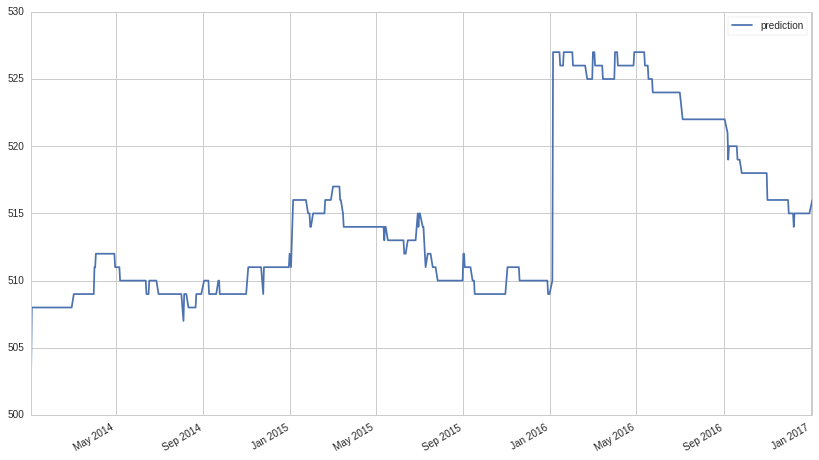

In [14]:
# Let's see how many securities we have a prediction for each day.
pipe_output.groupby(pipe_output.index.get_level_values(0)).count().plot()

The set of ~500 stocks in the PreCog top 500 is derived from market cap at the beginning of each year, which we can see above!

Now, you can to try writing an algorithm using this pipeline. The [final lesson in the Pipeline Tutorial](https://www.quantopian.com/tutorials/pipeline#lesson12) gives an example of moving from research to the IDE.

There is also an example algorithm using the PreCog 500 that can be found [here](https://www.quantopian.com/posts/alpha-vertex-precog-dataset).